In [85]:
import os
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from pandas.api.types import is_numeric_dtype, is_string_dtype
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('C:/Users/kyleg/Entity-Matching-in-Online-Retail')
from utility_functions import *

from IPython.display import display, HTML



'D:\\Documents\\Large-Scale Product Matching'

In [33]:
TRAIN_TEST_CATEGORIES = ['Computers_and_Accessories', 'Camera_and_Photo', 'Shoes', 'Jewelry']

os.chdir('D:/Documents/Large-Scale Product Matching/')

train_test_offers_df = pd.read_csv('train_test_offers_df.csv')
specs_df = pd.read_csv('specs_df.csv')
train_test_df_features = pd.read_csv('train_test_df_features.csv')

C:\Users\kyleg\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,49,50,51,52,53,54,55,56,57,58,60,61,62,63,64,65,67,68,69,70,71,72,73,74,76,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,97,98,99,100,102,104,105,106,107,108,109,110,112,114,115,119,122,123,126,127,128,129,130,131,132,134,135,136,137,140,141,143,147,148,149,150,151,152,153,154,155,156,157,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,182,183,185,188,189,190,191,192,193,194,195,196,198,199,200,201,202,203,206,207,209,210,211,212,213,214,215,217,218,219,220,221,222,224,226,227,228,229,230,231,232,233,236,240,241,246,247,248,249,251,252,253,254,255,259,260,261,262,270,271,273,274,275,276,277,278,279,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,305,308,309,311,315,317,318,319,320,323,324,325,328,330,3

In [59]:
train_test_offers_df.columns
# train_test_offers_df
calculate_percent_nulls(train_test_offers_df)

offer_id             0.000000
brand               53.271260
cluster_id           0.000000
description         25.375543
domain               0.000000
gtin                82.284295
identifier          99.925512
image               84.816884
manufacturer        89.199255
mpn                 32.302917
name                 0.099317
parent_title        21.738051
price               81.204221
priceCurrency       83.935444
productID           85.909373
relationToParent     0.000000
sku                 60.633147
category             0.086903
id_values            0.086903
dtype: float64


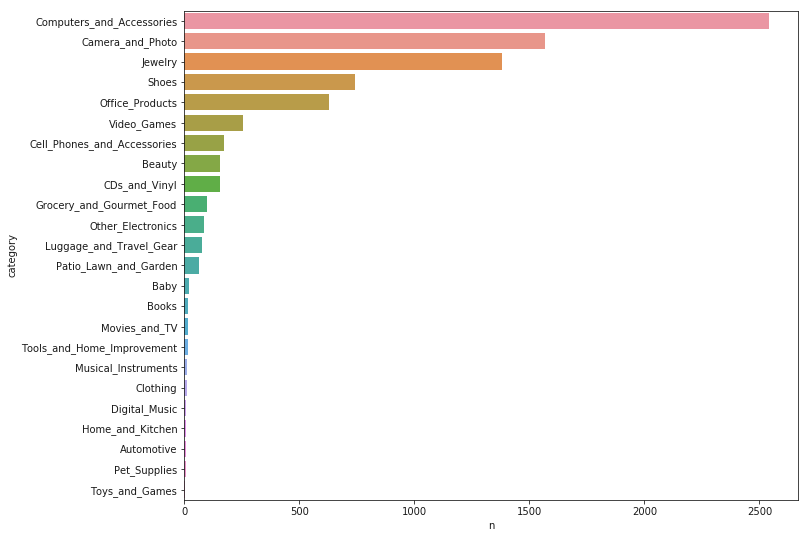

In [57]:
plt.figure(figsize=(11, 9))

offer_categories = train_test_offers_df.category.value_counts()
offer_categories_df = pd.DataFrame({'category': offer_categories.index, 'n': offer_categories})

sns.barplot(x='n', y='category', data=offer_categories_df)

C:\Users\kyleg\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,49,50,51,52,53,54,55,56,57,58,60,61,62,63,64,65,67,68,69,70,71,72,73,74,76,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,97,98,99,100,102,104,105,106,107,108,109,110,112,114,115,119,122,123,126,127,128,129,130,131,132,134,135,136,137,140,141,143,147,148,149,150,151,152,153,154,155,156,157,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,182,183,185,188,189,190,191,192,193,194,195,196,198,199,200,201,202,203,206,207,209,210,211,212,213,214,215,217,218,219,220,221,222,224,226,227,228,229,230,231,232,233,236,240,241,246,247,248,249,251,252,253,254,255,259,260,261,262,270,271,273,274,275,276,277,278,279,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,305,308,309,311,315,317,318,319,320,323,324,325,328,330,3

In [86]:
specs_df.shape
calculate_percent_nulls(specs_df)




offer_id                                0.000000
Unnamed: 1                             99.874529
# of Bays                              99.958176
# of Cores                             99.749059
# of Displays Supported                99.874529
# of Displays Supported â€¡            99.832706
# of External Connectors               99.330824
# of Internal Connectors               99.330824
# of QPI Links                         99.749059
# of Threads                           99.749059
10                                     99.958176
100                                    99.958176
15                                     99.958176
20                                     99.958176
200                                    99.958176
23.98 fps                              99.958176
29.97 fps                              99.958176
3000K                                  99.958176
35mm Equivalent                        99.790882
400                                    99.958176
4K Support          

C:\Users\kyleg\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
train_test_df_features

,label,brand_1,brand_2,category_1,category_2,cluster_id_1,cluster_id_2,dataset,description_1,description_2,...,priceCurrency_1,priceCurrency_2,price_1,price_2,productID_1,productID_2,relationToParent_1,relationToParent_2,sku_1,sku_2
0,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
1,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
2,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
3,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
4,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,"""<p>This fine watch, model number W20073X8 fro...",p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
5,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,NaN,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
6,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
7,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
8,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,"""<p>This fine watch, model number W20073X8 fro...",p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
9,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
